In [46]:

import pandas as pd 
import numpy as np


In [47]:
## 加载用户数据
user_columns = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users_df = pd.read_csv('../ml-100k/u.user', sep='|', names=user_columns) 
users_df.head(2)

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043


In [48]:

# 读取电影类型数据，使用 '|' 作为分隔符，指定编码为 'latin-1'
genre_df = pd.read_csv('../ml-100k/u.genre', sep='|', encoding='latin-1')

# 创建一个包含电影类型的列名列表，第一列为 "unknown"，后续列为从数据框中提取的类型名称
genre_columns = ["unknown"] + list(genre_df[genre_df.columns[0]].values)

movie_columns = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies_df = pd.read_csv('../ml-100k/u.item', sep='|', names=movie_columns+genre_columns,
                     encoding='latin-1')


movies_df = movies_df[["movie_id", "title"]]
movies_df.head(2)


,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)


In [49]:
# 读取评分数据
ratings_columns = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings_df = pd.read_csv('../ml-100k/u.data', sep='\t', names=ratings_columns)
ratings_df.drop( "unix_timestamp", inplace = True, axis = 1 ) 
ratings_df.head(2)

,user_id,movie_id,rating
0,196,242,3
1,186,302,3


In [50]:
## 按movie_id 合并
rating_movies_df = ratings_df.merge(movies_df, how="outer")
rating_movies_df.head(4)


,user_id,movie_id,rating,title
0,308,1,4,Toy Story (1995)
1,287,1,5,Toy Story (1995)
2,148,1,4,Toy Story (1995)
3,280,1,4,Toy Story (1995)


In [51]:

user_features_df = rating_movies_df.pivot_table(index="user_id", columns="title", values="rating").fillna(0.0)
user_features_df.head()




title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0


In [90]:

## 计算相似矩阵 [ 用户数 x 用户数 ]
def create_similarity_matrix(df):
    user_count = df.shape[0]
    print(user_count)
    usm =  np.zeros((user_count,user_count))

    for i in range(user_count):
        for j in range(user_count):
            if(i != j):
                rating_i = df[i]
                rating_j = df[j]
                dot_product = np.dot(rating_i,rating_j)
                norm_i = np.linalg.norm(rating_i)
                norm_j = np.linalg.norm(rating_j)
                if norm_i > 0 and norm_j > 0:
                    usm[i][j] = dot_product / (norm_i * norm_j)
                else:
                    usm[i][j] = 0
    return usm

# user_features_df 
user_features_array = user_features_df.to_numpy()
usm = create_similarity_matrix(user_features_array)    

usm

943


array([[0.        , 0.1689367 , 0.04838832, ..., 0.14908615, 0.18161191,
        0.39943184],
       [0.1689367 , 0.        , 0.11339323, ..., 0.16291072, 0.1752726 ,
        0.10673209],
       [0.04838832, 0.11339323, 0.        , ..., 0.10289899, 0.13675657,
        0.02699035],
       ...,
       [0.14908615, 0.16291072, 0.10289899, ..., 0.        , 0.10250951,
        0.09511958],
       [0.18161191, 0.1752726 , 0.13675657, ..., 0.10250951, 0.        ,
        0.18402235],
       [0.39943184, 0.10673209, 0.02699035, ..., 0.09511958, 0.18402235,
        0.        ]])

In [91]:
usm.shape

(943, 943)

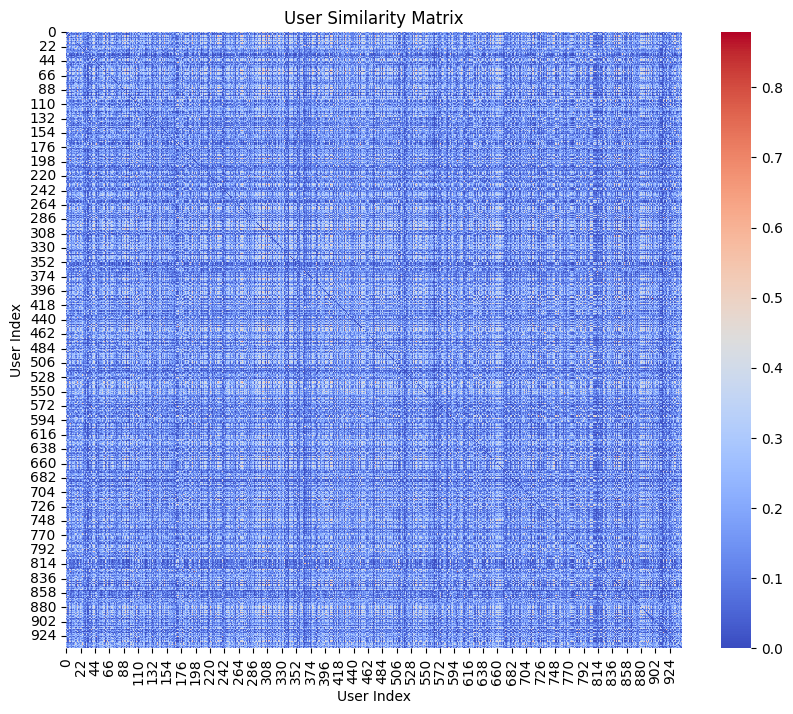

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(usm, cmap='coolwarm', annot=False, fmt="1f", square=True, cbar_kws={"shrink": 1})
plt.title('User Similarity Matrix')
plt.xlabel('User Index')
plt.ylabel('User Index')
plt.show()


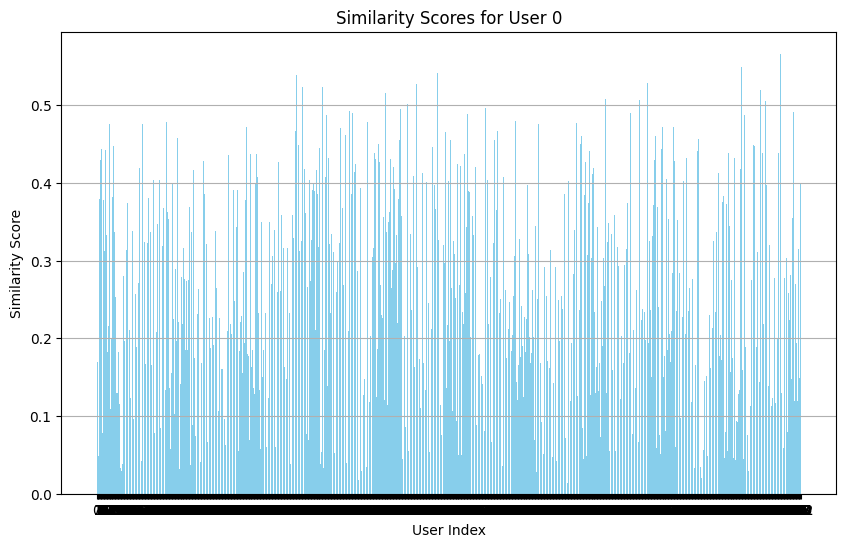

In [106]:
import matplotlib.pyplot as plt

# Select a specific user row from the similarity matrix (e.g., user 0)
user_index = 0
user_similarity = usm[user_index]

# Create a bar chart to visualize the similarity scores of the selected user
plt.figure(figsize=(10, 6))
plt.bar(range(len(user_similarity)), user_similarity, color='skyblue')
plt.title(f'Similarity Scores for User id {user_index}')
plt.xlabel('User Index')
plt.ylabel('Similarity Score')
plt.xticks(range(len(user_similarity)))
plt.grid(axis='y')
plt.show()


In [95]:
def find_top_n_similar_users(usm, user_id, n):
    # 获取指定用户的相似度分数
    similarity_scores = usm[user_id]
    
    # 获取前 n 个相似用户的索引（不包括用户自己）
    top_n_indices = np.argsort(similarity_scores)[-n-1:-1][::-1]
    
    # 创建一个元组列表 (user_id, similarity_score)
    top_n_similar_users = [(f"{index}", similarity_scores[index]) for index in top_n_indices]
    
    return top_n_similar_users



In [103]:

smu = find_top_n_similar_users(usm,0,10)

[('863', np.float64(0.5492769659400486)),
 ('456', np.float64(0.5413635362536567)),
 ('91', np.float64(0.5394148292008313)),
 ('267', np.float64(0.5388828815253691)),
 ('434', np.float64(0.5359605669750767)),
 ('737', np.float64(0.5286950009645097)),
 ('428', np.float64(0.527610440815716)),
 ('302', np.float64(0.5233874668921505)),
 ('275', np.float64(0.5232773602576194)),
 ('822', np.float64(0.5224946025929674))]

[863, 456, 91, 267, 434, 737, 428, 302, 275, 822]
